<a href="https://colab.research.google.com/github/nathalycristinabaltazarbautist-spec/Proyecto/blob/main/Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 1:


Dimensiones del conjunto de entrenamiento: (60000, 28, 28)
Dimensiones del conjunto de prueba: (10000, 28, 28)



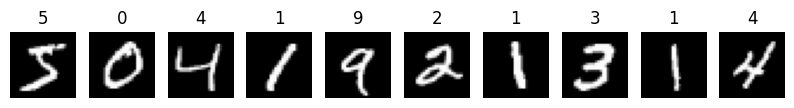

In [12]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Cargar el dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostrar las dimensiones de los conjuntos
print("\nDimensiones del conjunto de entrenamiento:", x_train.shape)
print("Dimensiones del conjunto de prueba:", x_test.shape)
print("")

# Visualizar los ejemplos
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

EJERCICIO 2:

In [13]:
from tensorflow.keras.utils import to_categorical

# Normalizamos los píxeles (0 a 255 → 0 a 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertirtimos las etiquetas a formato one-hot
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Ejemplo etiqueta original:", y_train[0])
print("Ejemplo etiqueta one-hot:", y_train_cat[0])

Ejemplo etiqueta original: 5
Ejemplo etiqueta one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


EJERCICIO 3:

In [14]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Reducimos el tiempo de entrenamiento
X_train_svm = x_train[:10000].reshape(10000, -1)
y_train_svm = y_train[:10000]
X_test_svm = x_test.reshape(x_test.shape[0], -1)

# Entrenamos el modelo
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_svm, y_train_svm)

# Evaluaamos la exactitud
y_pred_svm = clf.predict(X_test_svm)
print("La exactitud del modelo SVM es de:", accuracy_score(y_test, y_pred_svm))


La exactitud del modelo SVM es de: 0.9594


EJERCICIO 4:

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

mlp = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_mlp = mlp.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

loss, acc = mlp.evaluate(x_test, y_test_cat)
print("\nExactitud del modelo MLP:", acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8107 - loss: 0.6578 - val_accuracy: 0.9608 - val_loss: 0.1402
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9544 - loss: 0.1577 - val_accuracy: 0.9697 - val_loss: 0.1047
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9707 - loss: 0.1010 - val_accuracy: 0.9728 - val_loss: 0.0909
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9779 - loss: 0.0758 - val_accuracy: 0.9747 - val_loss: 0.0803
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9828 - loss: 0.0578 - val_accuracy: 0.9758 - val_loss: 0.0797
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9868 - loss: 0.0445 - val_accuracy: 0.9780 - val_loss: 0.0699
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9890 - loss: 0.0373 - val_accuracy: 0.9730 - val_loss: 0.0912
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9920 - loss: 0.0294 - val_accuracy: 0.

EJERCICIO 5:

In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Cargar y preparar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Modelo
model_adam = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_adam.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

print("\nEntrenando modelo con ADAM...")
history_adam = model_adam.fit(x_train, y_train_cat,
                              epochs=20, batch_size=128,
                              validation_split=0.1)

loss, acc = model_adam.evaluate(x_test, y_test_cat)
print(f"Precisión final (ADAM): {acc*100:.2f}%")

model_adam.save("modelo_adam.keras")
print("Guardado: modelo_adam.keras")



Entrenando modelo con ADAM...
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.8227 - loss: 0.6036 - val_accuracy: 0.9688 - val_loss: 0.1149
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9532 - loss: 0.1510 - val_accuracy: 0.9742 - val_loss: 0.0907
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9679 - loss: 0.1035 - val_accuracy: 0.9773 - val_loss: 0.0736
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9725 - loss: 0.0884 - val_accuracy: 0.9803 - val_loss: 0.0666
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9785 - loss: 0.0688 - val_accuracy: 0.9813 - val_loss: 0.0662
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9811 - loss: 0.0592 - val_accuracy: 0.9832 - val_loss: 0.0636
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9828 - loss: 0.0546 - val_accuracy: 0.9840 - val_loss: 0.0578
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9850

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

model_sgd = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_sgd.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nEntrenando modelo con SGD...")
history_sgd = model_sgd.fit(x_train, y_train_cat,
                            epochs=25, batch_size=128,
                            validation_split=0.1)

loss, acc = model_sgd.evaluate(x_test, y_test_cat)
print(f"Precisión final (SGD): {acc*100:.2f}%")

model_sgd.save("modelo_sgd.keras")
print("Guardado: modelo_sgd.keras")



Entrenando modelo con SGD...
Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7204 - loss: 0.9317 - val_accuracy: 0.9435 - val_loss: 0.1990
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9255 - loss: 0.2613 - val_accuracy: 0.9602 - val_loss: 0.1437
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9417 - loss: 0.1964 - val_accuracy: 0.9668 - val_loss: 0.1136
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9516 - loss: 0.1633 - val_accuracy: 0.9702 - val_loss: 0.1002
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9585 - loss: 0.1375 - val_accuracy: 0.9732 - val_loss: 0.0906
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9657 - loss: 0.1192 - val_accuracy: 0.9753 - val_loss: 0.0834
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9698 - loss: 0.1058 - val_accuracy: 0.9772 - val_loss: 0.0793
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9718 - 

In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

model_rms = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_rms.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nEntrenando modelo con RMSprop...")
history_rms = model_rms.fit(x_train, y_train_cat,
                            epochs=20, batch_size=128,
                            validation_split=0.1)

loss, acc = model_rms.evaluate(x_test, y_test_cat)
print(f"Precisión final (RMSprop): {acc*100:.2f}%")

model_rms.save("modelo_rms.keras")
print("Guardado: modelo_rms.keras")



Entrenando modelo con RMSprop...
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8300 - loss: 0.5605 - val_accuracy: 0.9662 - val_loss: 0.1178
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9512 - loss: 0.1609 - val_accuracy: 0.9745 - val_loss: 0.0810
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9649 - loss: 0.1113 - val_accuracy: 0.9793 - val_loss: 0.0721
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9708 - loss: 0.0919 - val_accuracy: 0.9797 - val_loss: 0.0700
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9760 - loss: 0.0763 - val_accuracy: 0.9812 - val_loss: 0.0668
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9794 - loss: 0.0665 - val_accuracy: 0.9825 - val_loss: 0.0624
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9815 - loss: 0.0585 - val_accuracy: 0.9818 - val_loss: 0.0710
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.983

EJERCICIO 6:

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Ajustar forma para CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(x_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

loss, acc = cnn.evaluate(x_test_cnn, y_test_cat)
print("\nLa exactitud de la CNN es:", acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.8518 - loss: 0.5270 - val_accuracy: 0.9810 - val_loss: 0.0694
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9808 - loss: 0.0627 - val_accuracy: 0.9863 - val_loss: 0.0498
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9878 - loss: 0.0402 - val_accuracy: 0.9833 - val_loss: 0.0563
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9892 - loss: 0.0325 - val_accuracy: 0.9898 - val_loss: 0.0380
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9930 - loss: 0.0226 - val_accuracy: 0.9890 - val_loss: 0.0384
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9908 - val_loss: 0.0373
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9959 - loss: 0.0139 - val_accuracy: 0.9912 - val_loss: 0.0389
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9965 - loss: 0.0112 - 

EJERCICIO 7:

In [20]:
from tensorflow.keras.layers import Dropout, BatchNormalization

cnn2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn2.fit(x_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 147ms/step - accuracy: 0.7783 - loss: 0.7784 - val_accuracy: 0.6930 - val_loss: 1.0143
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 62s 148ms/step - accuracy: 0.9623 - loss: 0.1236 - val_accuracy: 0.9855 - val_loss: 0.0507
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 62s 148ms/step - accuracy: 0.9726 - loss: 0.0851 - val_accuracy: 0.9880 - val_loss: 0.0417
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 145ms/step - accuracy: 0.9790 - loss: 0.0678 - val_accuracy: 0.9892 - val_loss: 0.0398
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 148ms/step - accuracy: 0.9825 - loss: 0.0564 - val_accuracy: 0.9908 - val_loss: 0.0346
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - accuracy: 0.9828 - loss: 0.0519 - val_accuracy: 0.9898 - val_loss: 0.0363
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - accuracy: 0.9833 - loss: 0.0522 - val_accuracy: 0.9908 - val_loss: 0.0339
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 63s 148ms/step - accuracy: 0.9863 - loss: 0

EJERCICIO 8:

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train_cnn)

cnn2.fit(datagen.flow(x_train_cnn, y_train_cat, batch_size=128),
         epochs=10, validation_data=(x_test_cnn, y_test_cat))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 182ms/step - accuracy: 0.9339 - loss: 0.2297 - val_accuracy: 0.9904 - val_loss: 0.0267
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 184ms/step - accuracy: 0.9644 - loss: 0.1152 - val_accuracy: 0.9914 - val_loss: 0.0247
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 182ms/step - accuracy: 0.9702 - loss: 0.0984 - val_accuracy: 0.9917 - val_loss: 0.0261
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 180ms/step - accuracy: 0.9723 - loss: 0.0897 - val_accuracy: 0.9920 - val_loss: 0.0227
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 184ms/step - accuracy: 0.9754 - loss: 0.0809 - val_accuracy: 0.9915 - val_loss: 0.0245
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 182ms/step - accuracy: 0.9752 - loss: 0.0799 - val_accuracy: 0.9931 - val_loss: 0.0198
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 188ms/step - accuracy: 0.9761 - loss: 0.0746 - val_accuracy: 0.9916 - val_loss: 0.0250
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 184ms/step - accuracy: 0.9766 - loss: 0.0760 - va

EJERCICIO 9:

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



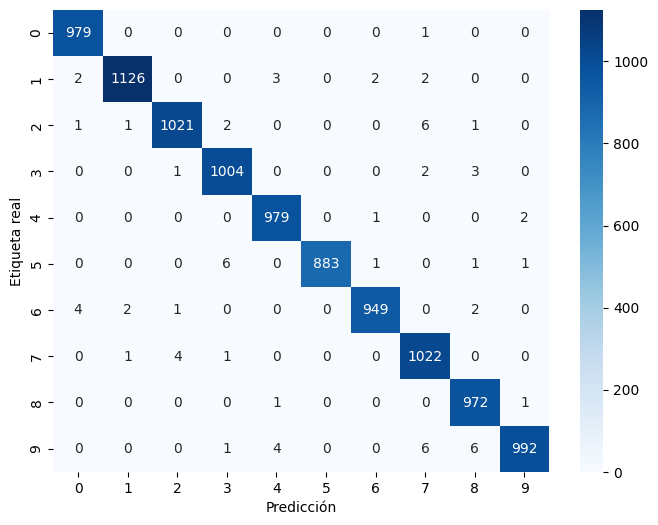

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred = cnn2.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("Reporte de clasificación:\n", classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()


EJERCICIO 10:

In [23]:
cnn2.save("modelo_mnist.h5")
print("Modelo guardado como modelo_mnist.h5")

from tensorflow.keras.models import load_model
modelo_cargado = load_model("modelo_mnist.h5")
loss, acc = modelo_cargado.evaluate(x_test_cnn, y_test_cat)
print("Precisión del modelo cargado:", acc)


Modelo guardado como modelo_mnist.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9913 - loss: 0.0228
Precisión del modelo cargado: 0.9926999807357788


EJERCICIO 11:

In [24]:
!pip install flask flask-ngrok

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

model = load_model("modelo_mnist.h5")

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['file']
    image = Image.open(file).convert('L')
    image = image.resize((28, 28))
    image = np.array(image).astype('float32') / 255.0
    image = image.reshape(1, 28, 28, 1)

    prediction = np.argmax(model.predict(image))
    return jsonify({'prediccion': int(prediction)})

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-3:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            